In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [79]:
# Find the most recent date in the data set.
with Session(engine) as session:
    date = session.query(func.max(Measurement.date)).one()
    print(date)

('2017-08-23',)


2016-08-23 00:00:00


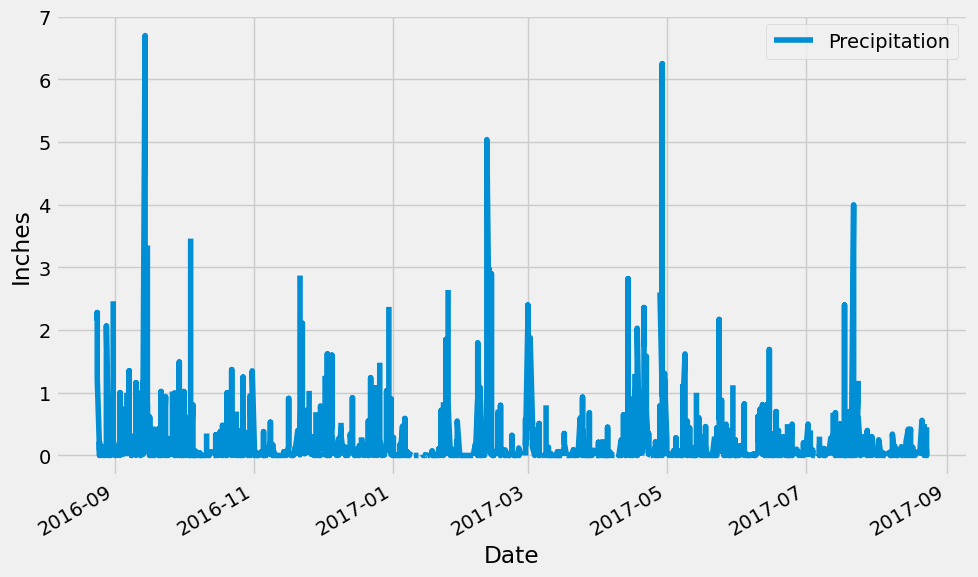

In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = dt.datetime(2017,8,23)
# Calculate the date one year from the last date in data set.
start_date = end_date - dt.timedelta(days=365)
print(start_date)
# Perform a query to retrieve the data and precipitation scores
with Session(engine) as session:
    results = (
        session.query(Measurement.date, Measurement.prcp)
        .filter(Measurement.date >= start_date)
        .all()
    )

# Save the query results as a Pandas DataFrame. Explicitly set the column names
columns_df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
columns_df['Date'] = pd.to_datetime(columns_df['Date'])
columns_df = columns_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
columns_df.set_index('Date', inplace=True)
columns_df.plot(figsize=(10, 6), legend=True)
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [106]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = columns_df['Precipitation'].describe()
summary_stats

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

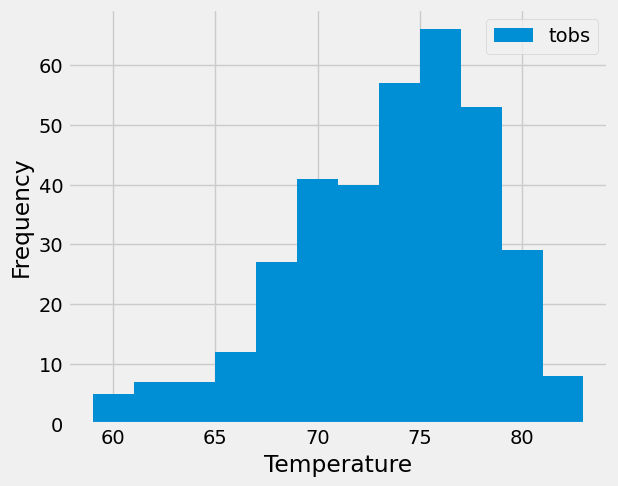

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()